# 0004.040 EDA - Shots on Target

In [24]:
import pathlib
# import os
import sys
# import pickle
# import inspect

import pandas as pd
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1
#add the 'src' directory to path to import modules
PROJECT_DIR = pathlib.Path.cwd().resolve().parent
sys.path.append(str(PROJECT_DIR))

from src.visualization.visualize import extend_cols, diagnose_discrete_fit
# from src.visualization.fit_dists import fit_nbinom

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

EDA_FP = PROJECT_DIR / 'data' / 'reference' / 'eda' / 'sample.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_orig = pd.read_csv(EDA_FP, parse_dates=['date']).sort_values(by=['date', 'h', 'a']).reset_index(drop=True)
cols = extend_cols([])
df_orig = df_orig[cols]
df_orig.head()

,nation,league,season,date,h,a,h_ftGoals,a_ftGoals,h_shots,a_shots,h_shotsOnTarget,a_shotsOnTarget,result
0,germany,bundesliga,2007-2008,2007-08-10,stuttgart,schalke,2.0,2.0,16,10,7,4,draw
1,germany,bundesliga,2007-2008,2007-08-11,bayern-munich,hansa-rostock,3.0,0.0,27,6,13,0,hwin
2,germany,bundesliga,2007-2008,2007-08-11,bochum,sv-werder-bremen,2.0,2.0,17,20,4,9,draw
3,germany,bundesliga,2007-2008,2007-08-11,eintracht-frankfurt,hertha-berlin,1.0,0.0,19,10,5,3,hwin
4,germany,bundesliga,2007-2008,2007-08-11,hannover,hamburger-sv,0.0,1.0,10,14,2,8,awin


In [3]:
df_orig.tail()

,nation,league,season,date,h,a,h_ftGoals,a_ftGoals,h_shots,a_shots,h_shotsOnTarget,a_shotsOnTarget,result
913,germany,bundesliga,2009-2010,2010-05-08,mainz,schalke,0.0,0.0,12,10,4,3,draw
914,germany,bundesliga,2009-2010,2010-05-08,nurnberg,fc-koln,1.0,0.0,13,5,3,2,hwin
915,germany,bundesliga,2009-2010,2010-05-08,sc-freiburg,dortmund,3.0,1.0,14,11,3,5,hwin
916,germany,bundesliga,2009-2010,2010-05-08,sv-werder-bremen,hamburger-sv,1.0,1.0,22,15,8,4,draw
917,germany,bundesliga,2009-2010,2010-05-08,wolfsburg,eintracht-frankfurt,3.0,1.0,16,19,7,3,hwin


In [7]:
df = df_orig.copy(deep=True)
h_shotsOnTargets = df['h_shotsOnTarget'].dropna().astype('int')
a_shotsOnTargets = df['a_shotsOnTarget'].dropna().astype('int')

h_shotsOnTargets_mean = df['h_shotsOnTarget'].mean()
a_shotsOnTargets_mean = df['a_shotsOnTarget'].mean()

h_shotsOnTargets_var = df['h_shotsOnTarget'].var()
a_shotsOnTargets_var = df['a_shotsOnTarget'].var()

print(f'Home SOT:\nMean:\t\t{h_shotsOnTargets_mean}\nVariance:\t{h_shotsOnTargets_var}')
print(f'Away SOT:\nMean:\t\t{a_shotsOnTargets_mean}\nVariance:\t{a_shotsOnTargets_var}')

Home SOT:
Mean:		5.350762527233115
Variance:	7.3250321332943376
Away SOT:
Mean:		4.17755991285403
Variance:	5.727434824650792


In [9]:
# Need to deal with any shot value that has no occurrences in any game
# eg 2 games have 5 shots | 0 games have 6 shots | 1 game has 7 shots
# !! Important to do this every freq count
max_sots = df[['h_shotsOnTarget', 'a_shotsOnTarget']].max().max().astype('int')
h_sots_val_counts = h_shotsOnTargets.value_counts()
h_sots_dist = h_shotsOnTargets.value_counts().sort_index(). \
                    reindex(range(max_sots+1), fill_value=0)
a_sots_val_counts = a_shotsOnTargets.value_counts()
a_sots_dist = a_shotsOnTargets.value_counts().sort_index(). \
                    reindex(range(max_sots+1), fill_value=0)    

sots_dists = pd.concat([h_sots_dist, a_sots_dist], axis=1)


print(f'Home and Away Goals Distributions:\n\n{sots_dists}\n')

Home and Away Goals Distributions:

    h_shotsOnTarget  a_shotsOnTarget
0                 7               29
1                44               68
2                64              145
3               121              158
4               146              154
5               143              126
6               135               94
7                82               57
8                62               33
9                40               33
10               25               11
11               21                4
12               14                1
13                8                3
14                5                2
15                1                0



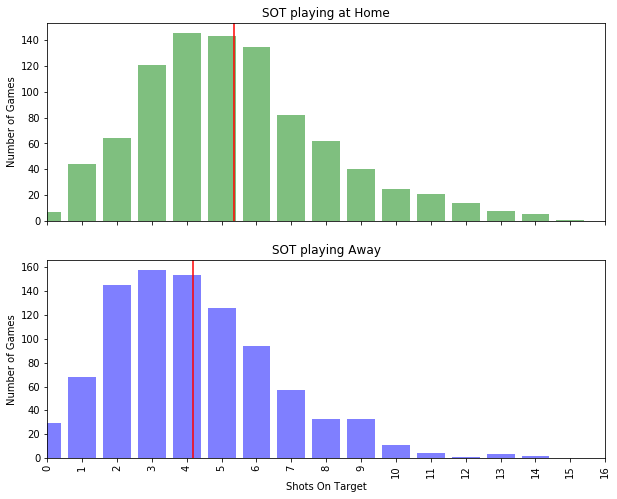

In [11]:
# plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,figsize=(10,8), sharex=True)


ax1.bar(sots_dists.index, sots_dists['h_shotsOnTarget'], color='g', alpha=0.5, label='Home SOT')
ax1.axvline(h_shotsOnTargets_mean, color='r')
ax1.set_title('SOT playing at Home')
ax1.set_ylabel('Number of Games')

ax2.bar(sots_dists.index, sots_dists['a_shotsOnTarget'], color='b', alpha=0.5, label='Away SOT')
ax2.axvline(a_shotsOnTargets_mean, color='r')
ax2.set_title('SOT playing Away')
ax2.set_ylabel('Number of Games')
ax2.set_xlabel('Shots On Target')
ax2.set_xlim(0, len(sots_dists))

tick_spacing = 1
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)

plt.show();

In [12]:
## Need QQ Plots here

#If needed, try transform

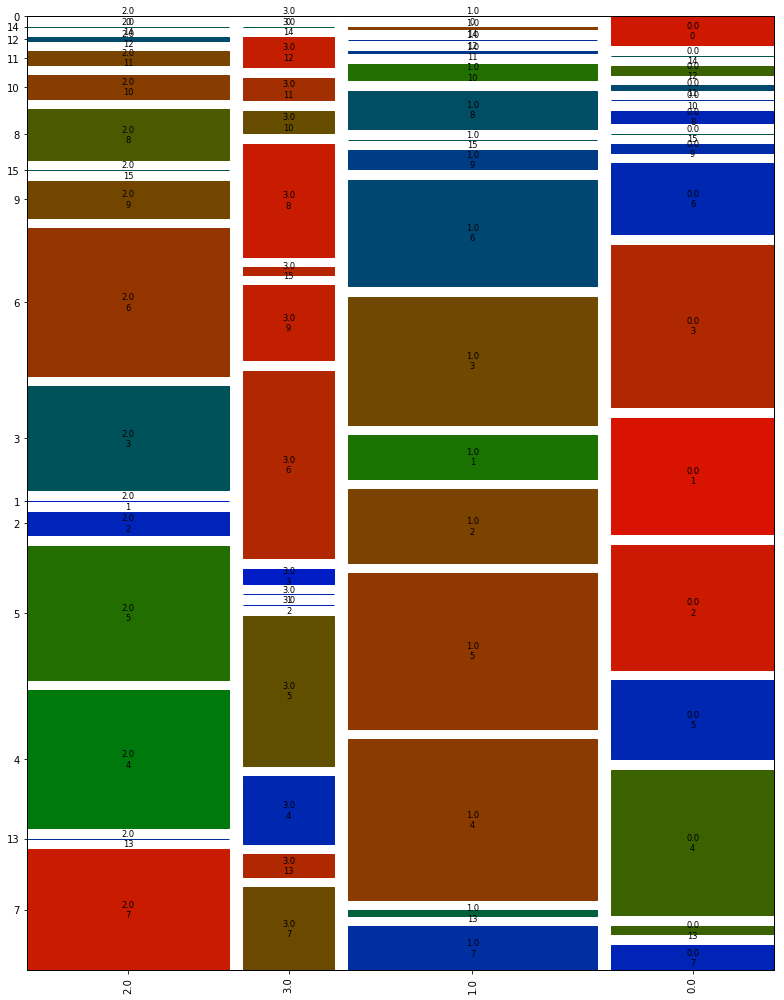

In [15]:
# plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(11,14))
cut_df = df[df['h_ftGoals'] < 4]
data = cut_df[['h_shotsOnTarget', 'h_ftGoals']]
mosaic(data, ['h_ftGoals', 'h_shotsOnTarget'], statistic=True, ax=ax, label_rotation=[90,0], gap=0.02)
#fig.set_size_inches((10,8))#.fig
plt.tight_layout()
plt.show();

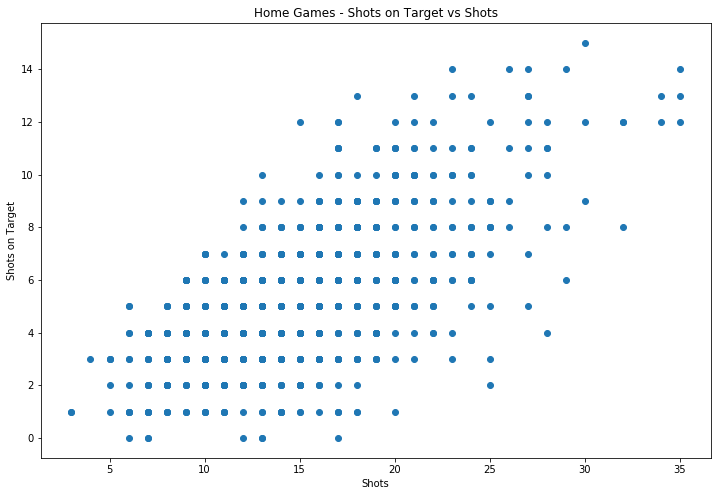

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df['h_shots'], df['h_shotsOnTarget'])
ax.set_xlabel('Shots')
ax.set_ylabel('Shots on Target')
ax.set_title('Home Games - Shots on Target vs Shots')

plt.show();

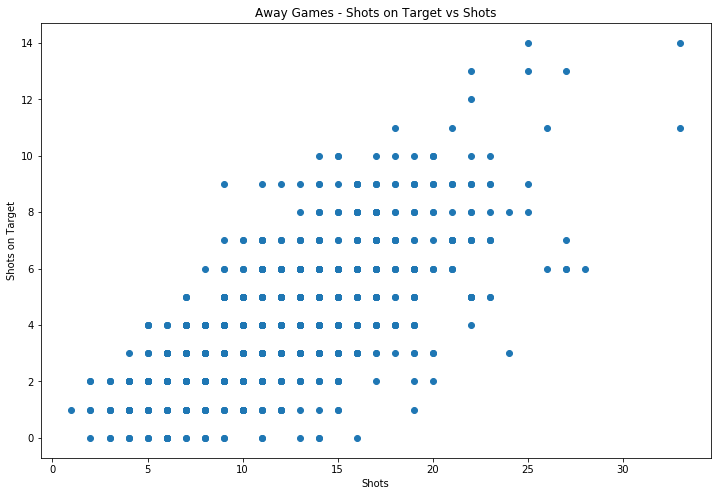

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df['a_shots'], df['a_shotsOnTarget'])
ax.set_xlabel('Shots')
ax.set_ylabel('Shots on Target')
ax.set_title('Away Games - Shots on Target vs Shots')

plt.show();

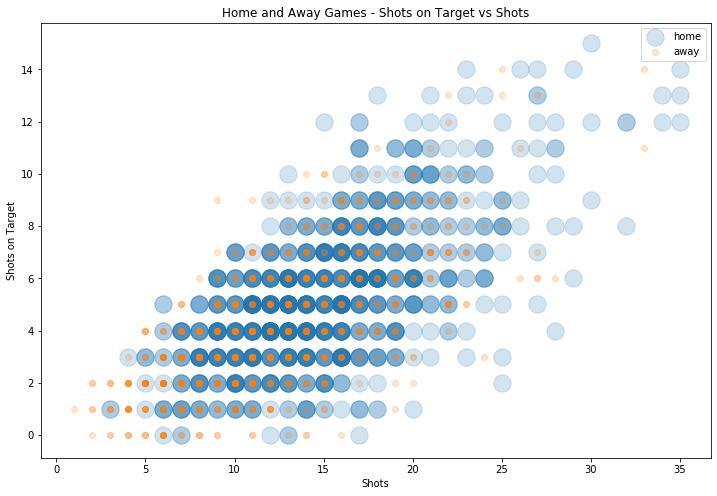

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df['h_shots'], df['h_shotsOnTarget'], s=300, alpha=0.2, label='home')
ax.scatter(df['a_shots'], df['a_shotsOnTarget'], alpha=0.2, label='away')
ax.set_xlabel('Shots')
ax.set_ylabel('Shots on Target')
ax.set_title('Home and Away Games - Shots on Target vs Shots')

plt.legend()
plt.show();

In [19]:
df['h_conv_rate'] = df['h_shotsOnTarget']/df['h_shots']
df.head()

,nation,league,season,date,h,a,h_ftGoals,a_ftGoals,h_shots,a_shots,h_shotsOnTarget,a_shotsOnTarget,result,h_conv_rate
0,germany,bundesliga,2007-2008,2007-08-10,stuttgart,schalke,2.0,2.0,16,10,7,4,draw,0.437500
1,germany,bundesliga,2007-2008,2007-08-11,bayern-munich,hansa-rostock,3.0,0.0,27,6,13,0,hwin,0.481481
2,germany,bundesliga,2007-2008,2007-08-11,bochum,sv-werder-bremen,2.0,2.0,17,20,4,9,draw,0.235294
3,germany,bundesliga,2007-2008,2007-08-11,eintracht-frankfurt,hertha-berlin,1.0,0.0,19,10,5,3,hwin,0.263158
4,germany,bundesliga,2007-2008,2007-08-11,hannover,hamburger-sv,0.0,1.0,10,14,2,8,awin,0.200000


count    918.000000
mean       0.357740
std        0.144208
min        0.000000
25%        0.261442
50%        0.352941
75%        0.454545
max        0.833333
Name: h_conv_rate, dtype: float64

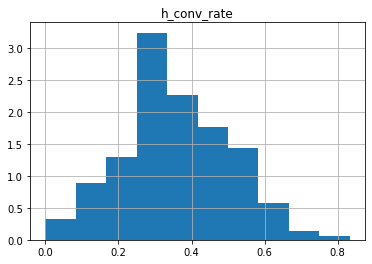

In [20]:
df.hist(column=['h_conv_rate'], density=True);
df['h_conv_rate'].describe()

In [21]:
df['a_conv_rate'] = df['a_shotsOnTarget']/df['a_shots']
df.head()
df['a_conv_rate'].describe()

count    918.000000
mean       0.344658
std        0.156426
min        0.000000
25%        0.250000
50%        0.333333
75%        0.428571
max        1.000000
Name: a_conv_rate, dtype: float64

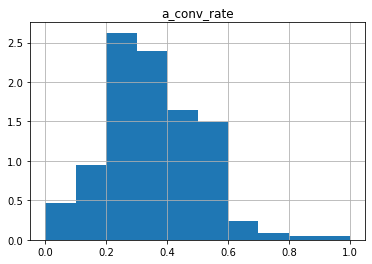

In [22]:
df.hist(column=['a_conv_rate'], density=True);

In [25]:
df['h1_conv_rate'] = df['h_ftGoals']/df['h_shotsOnTarget']
df['h1_conv_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['h1_conv_rate'].dropna(inplace=True)
#df['h_conv_rate'] = df['h_sot']/df['h_shots']
#df.head()
df['h1_conv_rate'].head()

0    0.285714
1    0.230769
2    0.500000
3    0.200000
4    0.000000
Name: h1_conv_rate, dtype: float64

In [26]:
df['h1_conv_rate'].describe()

count    911.000000
mean       0.312375
std        0.246203
min        0.000000
25%        0.142857
50%        0.285714
75%        0.500000
max        1.333333
Name: h1_conv_rate, dtype: float64

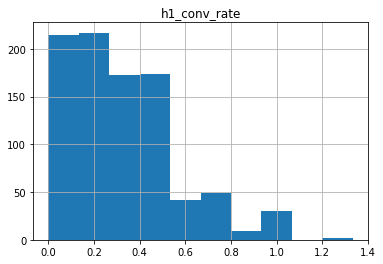

In [27]:
df.hist(column=['h1_conv_rate']);

In [28]:
df['a1_conv_rate'] = df['a_ftGoals']/df['a_shotsOnTarget']
#df.head()
df['a1_conv_rate'].describe()

count    889.000000
mean       0.306930
std        0.278662
min        0.000000
25%        0.000000
50%        0.285714
75%        0.500000
max        2.000000
Name: a1_conv_rate, dtype: float64

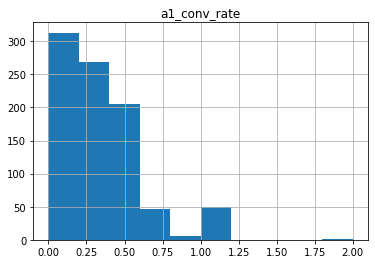

In [29]:
df.hist(column=['a1_conv_rate']);

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]), <a list of 23 Text xticklabel objects>)

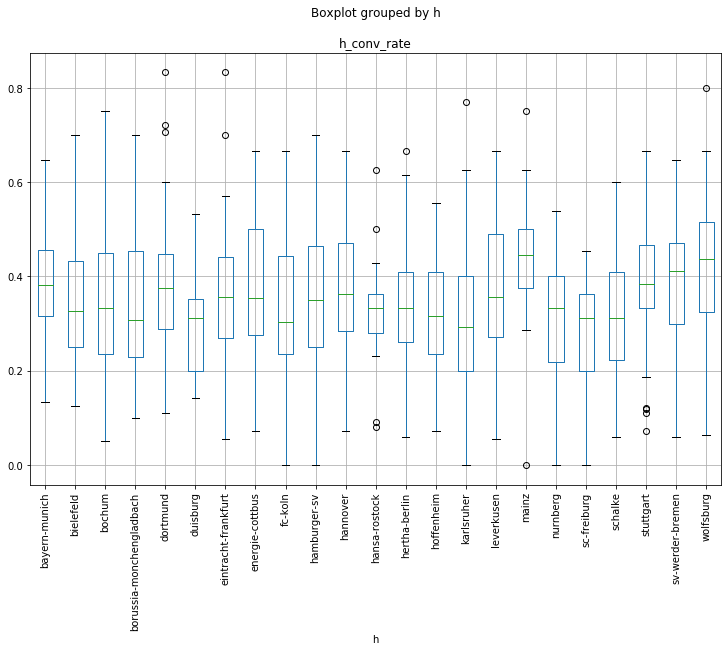

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
plt.suptitle('')
df.boxplot(column=['h_conv_rate'], by='h', ax=ax)
plt.xticks(rotation=90)

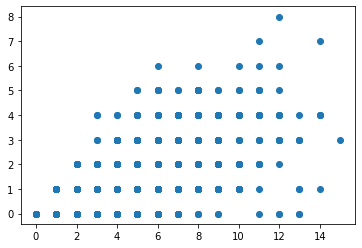

In [32]:
plt.scatter(df['h_shotsOnTarget'], df['h_ftGoals'])

NOTE - FUTURE DIRECTION

If we assume that historical sots is a reasonably good predictor of future sots

And sots is related to goals scored, but it is related very noisily by the distribution shown above

If we approximate this as a skewed normal, or an exponentially modified gaussian, then we can predict goals from sot

OR, we can assume a stright line from bottom left to top right, which is massively messed up by significant noise

We can use a Mixture Density Network to estimate the underlying struture plus the noise

https://engineering.taboola.com/predicting-probability-distributions/

https://en.wikipedia.org/wiki/Skew_normal_distribution

https://en.wikipedia.org/wiki/Exponentially_modified_Gaussian_distribution

This will give us a distribution we can samle from to get probability of game scores

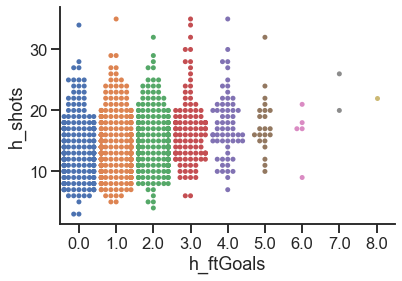

In [33]:


sns.set(style='ticks', context='talk')
#iris = sns.load_dataset('iris')

sns.swarmplot(df['h_ftGoals'], df['h_shots'])#'species', 'sepal_length', data=iris)
sns.despine()

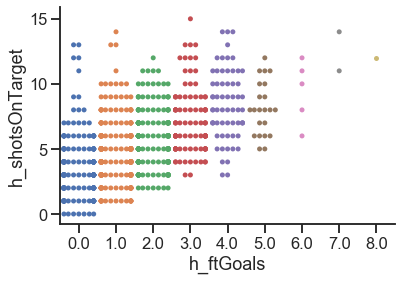

In [34]:
sns.set(style='ticks', context='talk')
#iris = sns.load_dataset('iris')

sns.swarmplot(df['h_ftGoals'], df['h_shotsOnTarget'])#'species', 'sepal_length', data=iris)
sns.despine()

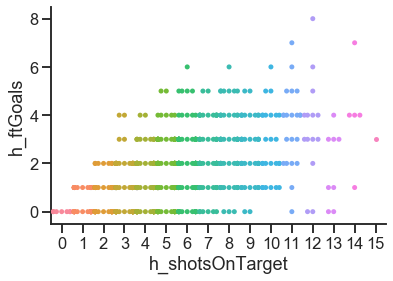

In [35]:
sns.set(style='ticks', context='talk')
sns.swarmplot(df['h_shotsOnTarget'], df['h_ftGoals'])#'species', 'sepal_length', data=iris)
sns.despine()

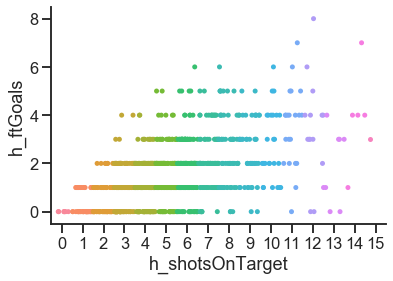

In [36]:
sns.stripplot(df['h_shotsOnTarget'], df['h_ftGoals'], jitter=0.5)
sns.despine()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]), <a list of 23 Text xticklabel objects>)

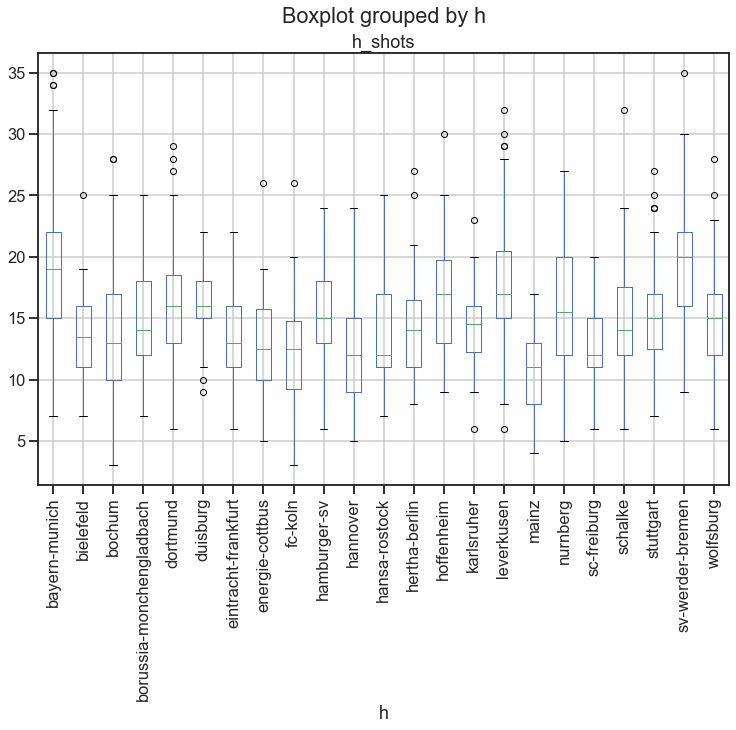

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
plt.suptitle('')
df.boxplot(column=['h_shots'], by='h', ax=ax)
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]), <a list of 23 Text xticklabel objects>)

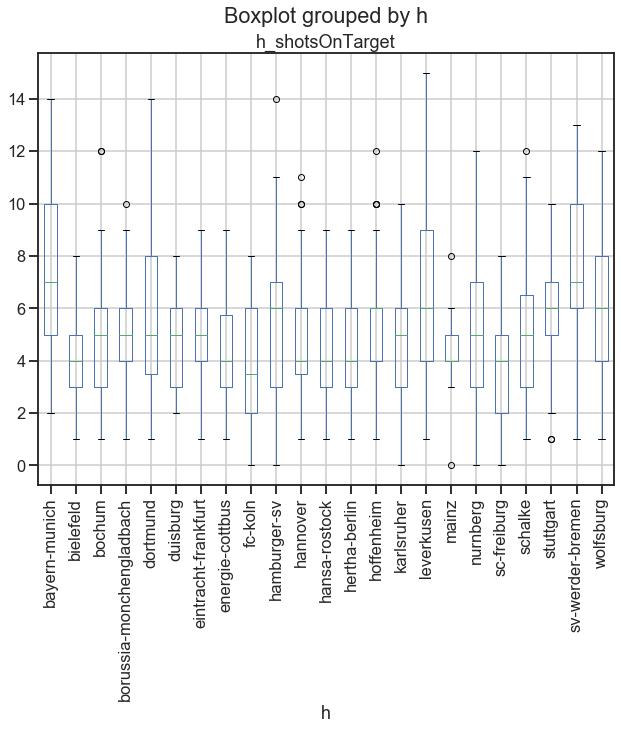

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['h_shotsOnTarget'], by='h', ax=ax)
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]), <a list of 23 Text xticklabel objects>)

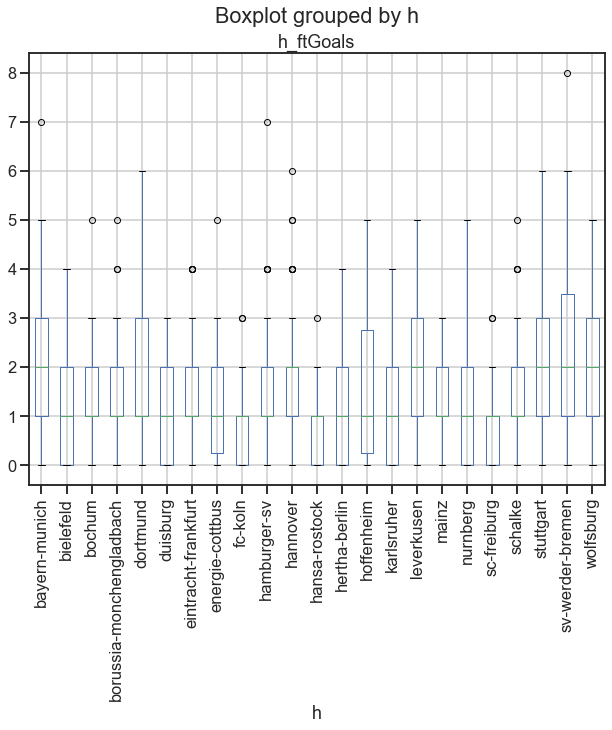

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['h_ftGoals'], by='h', ax=ax)
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]), <a list of 23 Text xticklabel objects>)

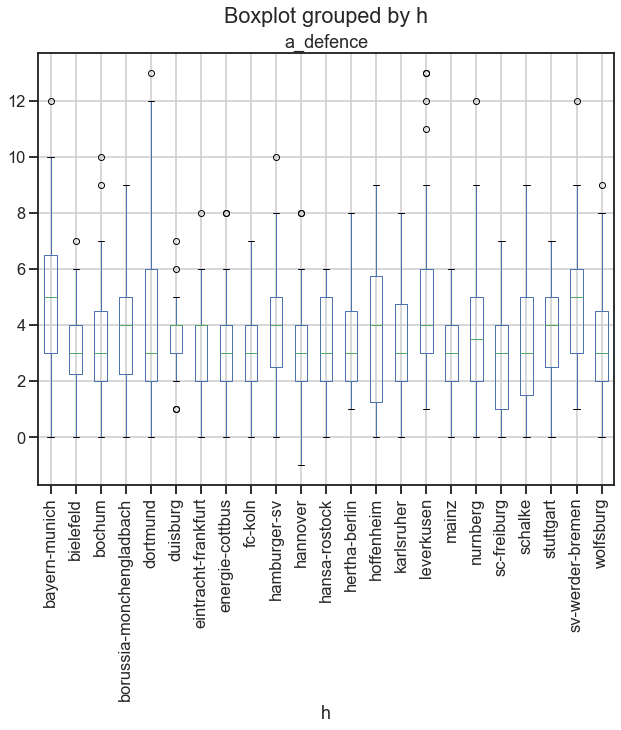

In [40]:
df['h_defence'] = df['a_shotsOnTarget'] - df['a_ftGoals']
df['a_defence'] = df['h_shotsOnTarget'] - df['h_ftGoals']
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['a_defence'], by='h', ax=ax)
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11e326fdd8>]],
      dtype=object)

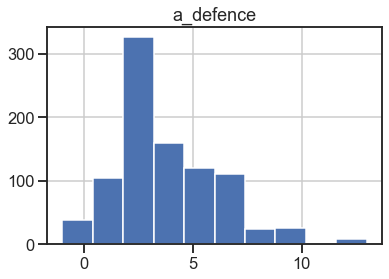

In [41]:
df.hist(column=['a_defence'])